In [1]:
import torch
import torch.nn as nn

class RevIN(nn.Module):
    def __init__(self, num_features: int, eps=1e-5, affine=True):
        """
        :param num_features: the number of features or channels
        :param eps: a value added for numerical stability
        :param affine: if True, RevIN has learnable affine parameters
        """
        super(RevIN, self).__init__()
        self.num_features = num_features
        self.eps = eps
        self.affine = affine
        if self.affine:
            self._init_params()

    def forward(self, x, mode:str):
        if mode == 'norm':
            self._get_statistics(x)
            x = self._normalize(x)
        elif mode == 'denorm':
            x = self._denormalize(x)
        else: raise NotImplementedError
        return x

    def _init_params(self):
        # initialize RevIN params: (C,)
        self.affine_weight = nn.Parameter(torch.ones(self.num_features))
        self.affine_bias = nn.Parameter(torch.zeros(self.num_features))

    def _get_statistics(self, x):
        dim2reduce = tuple(range(1, x.ndim-1))
        self.mean = torch.mean(x, dim=dim2reduce, keepdim=True).detach()
        self.stdev = torch.sqrt(torch.var(x, dim=dim2reduce, keepdim=True, unbiased=False) + self.eps).detach()

    def _normalize(self, x):
        x = x - self.mean
        x = x / self.stdev
        if self.affine:
            x = x * self.affine_weight
            x = x + self.affine_bias
        return x

    def _denormalize(self, x):
        if self.affine:
            x = x - self.affine_bias
            x = x / (self.affine_weight + self.eps*self.eps)
        x = x * self.stdev
        x = x + self.mean
        return x
    def _box_cox(self,x):#normalzation before standard nomalization for tsf
        
        return x

c:\Users\CountingStars\.conda\envs\torch_test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# from RevIN import RevIN

input = torch.randn(8,96,7)
print(input.ndim-1)
dim2reduce = tuple(range(1, input.ndim-1))
print(dim2reduce)
b, l, c = input.size() # (B,C,L) (32,96,512)
num_features = c
revin_layer = RevIN(num_features)
x_in = revin_layer(input, 'norm')
# x_out = blocks(x_in) # your model or subnetwork within the model
x_out = x_in
x_out = revin_layer(x_out, 'denorm')

2
(1,)


In [9]:
range(1,2)
print(range(1,2))

range(1, 2)


C:\Users\COUNTI~1\AppData\Local\Temp/ipykernel_33620/2882421902.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(input)


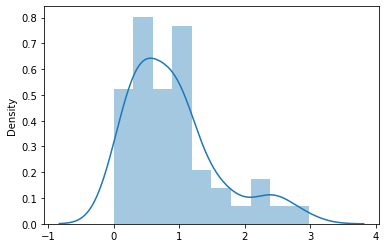

C:\Users\COUNTI~1\AppData\Local\Temp/ipykernel_33620/2882421902.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(converted_data1)


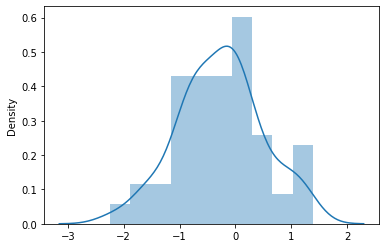

In [8]:
#套壳
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import torch

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

input = torch.randn(8,96,7)
# input = torch.randn(96)
input = torch.abs(input)

converted_data1 = stats.boxcox(input)[0] #对数据进行BOX-COX变换

sns.distplot(input)
plt.show()
sns.distplot(converted_data1)
plt.show()
